# Titanic Survival Prediction

### Import all dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Data Collection and Preprocessing

In [50]:
# load dataset
titanic_data = pd.read_csv("Data/train.csv")

In [51]:
# show dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# dataset dimention
titanic_data.shape

(891, 12)

In [53]:
# dataset information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
# check null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
# drop the cabin column, too much missing values and dont matter that much
titanic_data = titanic_data.drop(columns="Cabin", axis = 1)

In [56]:
# take mean values to fill up mising values in Age column
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace = True)

In [57]:
# take mode values to fill the Embarked values
titanic_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [58]:
# we need the first value
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace = True)

In [59]:
# again check for missing values
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Data Analysis and Visualisation

In [60]:
# statistical measures of dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# use plots from seaborn
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Passenger Class Distribution')

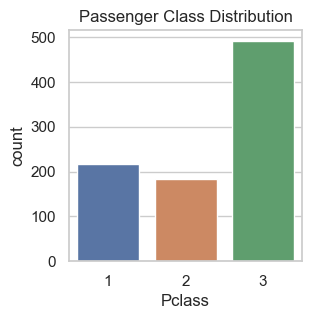

In [62]:
# set figure size
plt.figure(figsize=(3,3))
# Passenger Class
sns.countplot(x=titanic_data["Pclass"])
#title
plt.title("Passenger Class Distribution")

Text(0.5, 1.0, 'Gender Distribution')

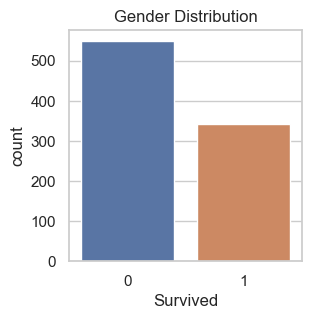

In [63]:
# set figure size
plt.figure(figsize=(3,3))
# plot survivals
sns.countplot(x = "Survived", data = titanic_data)
#title
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Survival from each Gender')

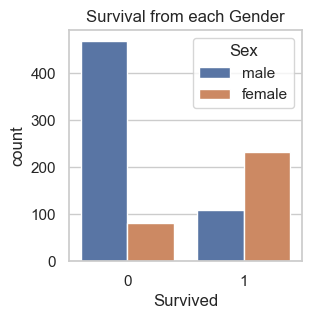

In [64]:
# set figure size
plt.figure(figsize=(3,3))
# plot survivals with gender grouping
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data)
#title
plt.title("Survival from each Gender")

Text(0.5, 1.0, 'Survival from each passenger class')

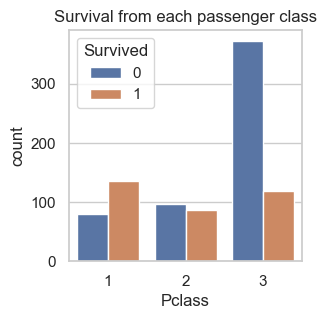

In [65]:
# set figure size
plt.figure(figsize=(3,3))
# plot survivals passenger class grouping
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_data)
#title
plt.title("Survival from each passenger class")

Text(0.5, 1.0, 'Survival from Embarcation')

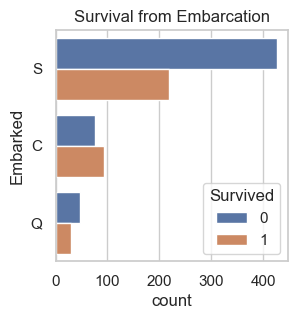

In [66]:
# set figure size
plt.figure(figsize=(3,3))
# plot survivals passenger class grouping
sns.countplot(y = "Embarked", hue = "Survived", data = titanic_data)
#title
plt.title("Survival from Embarcation")

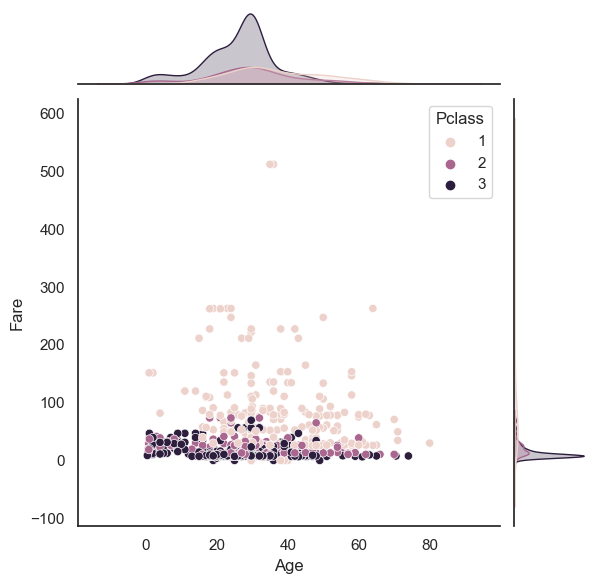

In [67]:
sns.set(style="white")
# plot age, fare passanger class
sns.jointplot(data=titanic_data, x="Age", y="Fare", hue="Pclass")

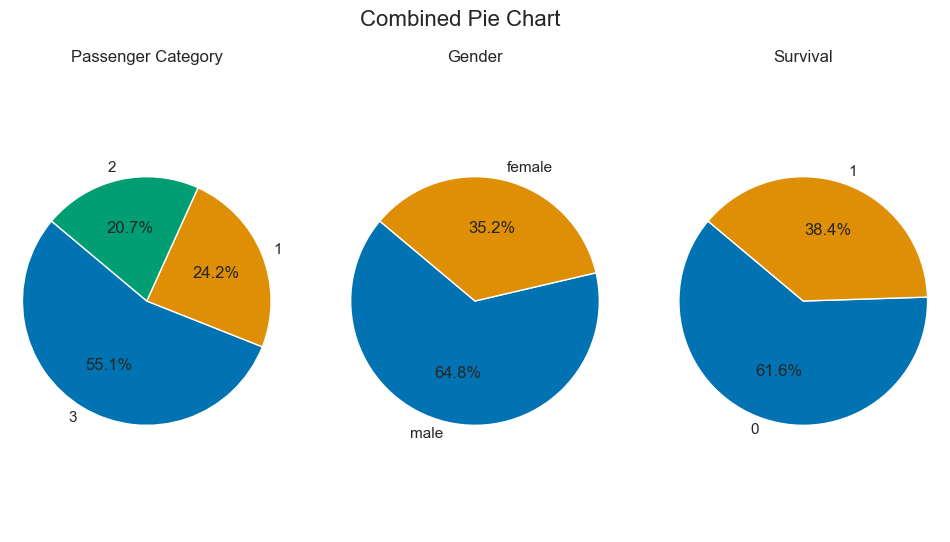

In [68]:
# set colors
clr = sns.color_palette("colorblind")

# Passener, gender, servival counts
Pcat = titanic_data["Pclass"].value_counts()
Gcat = titanic_data["Sex"].value_counts()
Scat = titanic_data["Survived"].value_counts()

# Create a figure with three subplots (pies)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first feature (left subplot)
ax1.pie(Pcat, labels=Pcat.index, autopct='%1.1f%%', colors = clr, startangle=140)
ax1.set_title('Passenger Category')

# Plot the second feature (middle subplot)
ax2.pie(Gcat, labels=Gcat.index, autopct='%1.1f%%', colors = clr, startangle=140)
ax2.set_title('Gender')

# Plot the third feature (right subplot)
ax3.pie(Scat, labels=Scat.index, autopct='%1.1f%%', colors = clr, startangle=140)
ax3.set_title('Survival')

# Ensure equal aspect ratio for both subplots
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')

# Add a title for the entire figure
fig.suptitle('Combined Pie Chart', fontsize=16)

# Display the pie chart
plt.show()


### Encoding categorical features

In [69]:
# encodeing gender and embarked columns
titanic_data.replace({"Sex": {"male": 1, "female": 0},
                      "Embarked": {"S":0, "C":1, "Q":2}}, inplace = True)

In [70]:
# check dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


### Separating Features and Target

In [71]:
X = titanic_data.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis = 1)
Y = titanic_data["Survived"]

In [72]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         0
1         1    0  38.000000      1      0  71.2833         1
2         3    0  26.000000      0      0   7.9250         0
3         1    0  35.000000      1      0  53.1000         0
4         3    1  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         0
887       1    0  19.000000      0      0  30.0000         0
888       3    0  29.699118      1      2  23.4500         0
889       1    1  26.000000      0      0  30.0000         1
890       3    1  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### Train Test Split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [74]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (891, 7)
Train data:  (712, 7)
Test data:  (179, 7)


In [75]:
print(X_train)
print(Y_train)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
30        1    1  40.000000      0      0   27.7208         1
10        3    0   4.000000      1      1   16.7000         0
873       3    1  47.000000      0      0    9.0000         0
182       3    1   9.000000      4      2   31.3875         0
876       3    1  20.000000      0      0    9.8458         0
..      ...  ...        ...    ...    ...       ...       ...
534       3    0  30.000000      0      0    8.6625         0
584       3    1  29.699118      0      0    8.7125         1
493       1    1  71.000000      0      0   49.5042         1
527       1    1  29.699118      0      0  221.7792         0
168       1    1  29.699118      0      0   25.9250         0

[712 rows x 7 columns]
30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64


### Model Training

In [76]:
model = LogisticRegression(max_iter=1000)

In [77]:
#training the Logistic Regression model
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Model Evaluation

In [78]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8089887640449438


In [79]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on training data: ", test_data_accuracy)

Accuracy on training data:  0.7821229050279329


### Predictive System

In [84]:
# find not survived
titanic_data[titanic_data["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,1
...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,0


In [85]:
sample = titanic_data.iloc[887].drop(["PassengerId", "Name", "Ticket", "Survived"]).values
sample

array([1, 0, 19.0, 0, 0, 30.0, 0], dtype=object)

In [86]:
input_data = (1, 0, 19.0, 0, 0, 30.0, 0)

# changing input data to a numpy array
input_data_as_numpy_arr = np.asarray(input_data)

# reshape the numpy array as we're predicting for one instance
input_data_reshaped = input_data_as_numpy_arr.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
    print("The person survived.")
else:
    print("The person couldn't survive.")

[1]
The person survived.


C:\Users\TanveerKader\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
